<a href="https://colab.research.google.com/github/shahrooz-coder/freelancer/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

#Data loading

In [176]:
URL='https://raw.githubusercontent.com/shahrooz-coder/freelancer/main/heart.csv'
df=pd.read_csv(URL)

In [177]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [178]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preproccessing

In [180]:
# Seperate features and label
df_features=df.drop('HeartDisease',axis=1)
df_label=df['HeartDisease']
# Seperate numerical and categorial features
numeric_cols = df_features.select_dtypes(include='number').columns
categorical_cols = df_features.select_dtypes(include='object').columns


In [181]:
scaler=MinMaxScaler(feature_range=(0,1))
df_features_numeric_cols=scaler.fit_transform(df_features[numeric_cols])
# Change array to dataframe
df_features_numeric_cols = pd.DataFrame(df_features_numeric_cols, columns=numeric_cols)

In [182]:
ohe=OneHotEncoder()
df_features_categorical_cols=ohe.fit_transform(df_features[categorical_cols])
# for better combination we should change it to Dataframe
df_features_categorical_cols=pd.DataFrame(df_features_categorical_cols.toarray(),columns=ohe.get_feature_names_out())

In [183]:
# Constructing final dataframe
df_features=pd.concat([df_features_numeric_cols,df_features_categorical_cols],axis=1)

In [184]:
df_features.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
917,0.204082,0.69,0.290216,0.0,0.795775,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [185]:
X_train,X_test,y_train,y_test=train_test_split(df_features,df_label,test_size=0.2,shuffle=True,random_state=42)

# Finding best model
1.Logistic Regression\
2.SVM\
3.KNN\
4.Random Forest\
5.Naive Bayes\
6.Neural Network

# 1.Logistic Regression

In [186]:
lr= LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}
lr_grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best accuracy for Logistic Regression:", lr_grid_search.best_score_)


Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100}
Best accuracy for Logistic Regression: 0.8691827415897866


In [187]:
best_model_lr = lr_grid_search.best_estimator_
y_pred = best_model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8532608695652174


# 2.SVM

In [188]:
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
svm_grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best accuracy for SVM:", svm_grid_search.best_score_)


Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best accuracy for SVM: 0.8664523343584009


In [189]:
best_model_svm = svm_grid_search.best_estimator_
y_pred = best_model_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8641304347826086


#3.KNN

In [190]:
knn=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best accuracy for KNN:", knn_grid_search.best_score_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy for KNN: 0.8691734227937751


In [191]:
best_model_knn= knn_grid_search.best_estimator_
y_pred = best_model_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.842391304347826


#4.Random forest

In [192]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print("Best parameters for RF:", rf_grid_search.best_params_)
print("Best accuracy for RF:", rf_grid_search.best_score_)

Best parameters for RF: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy for RF: 0.8800950517193179


In [193]:
best_model_rf= rf_grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9021739130434783


#5.Naive Bayes

In [194]:
gnb = GaussianNB() #GaussianNB doesn't have hyperparameter
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8641304347826086


#6.Neural Network

In [195]:
#turn dataframe to tensor+(.values)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

In [196]:
X_train_tensor.shape,X_test_tensor.shape,y_train_tensor.shape,y_test_tensor.shape

(torch.Size([734, 20]),
 torch.Size([184, 20]),
 torch.Size([734, 1]),
 torch.Size([184, 1]))

In [197]:
input_dim = X_train_tensor.shape[1]
input_dim

20

In [198]:
class AdvancedNN(nn.Module):
    def __init__(self, input_dim, hidden1=64, hidden2=32, dropout_rate=0.3):
        super(AdvancedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.bn1 = nn.BatchNorm1d(hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.bn2 = nn.BatchNorm1d(hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

In [199]:
param_grid = {
    'hidden1': [32, 64],
    'hidden2': [16, 32],
    'dropout_rate': [0.2, 0.3],
    'lr': [0.001, 0.01]
}
best_acc = 0
best_params = None
best_model = None

for h1 in param_grid['hidden1']:
    for h2 in param_grid['hidden2']:
        for dr in param_grid['dropout_rate']:
            for lr in param_grid['lr']:
                model = AdvancedNN(input_dim, hidden1=h1, hidden2=h2, dropout_rate=dr)
                criterion = nn.BCELoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                epochs = 200
                for epoch in range(epochs):
                    model.train()
                    optimizer.zero_grad()
                    outputs = model(X_train_tensor)
                    loss = criterion(outputs, y_train_tensor)
                    loss.backward()
                    optimizer.step()

                model.eval()
                with torch.no_grad():
                    y_test_pred = (model(X_test_tensor) > 0.5).float()
                    acc = accuracy_score(y_test_tensor, y_test_pred)

                if acc > best_acc:
                    best_acc = acc
                    best_params = {'hidden1': h1, 'hidden2': h2, 'dropout_rate': dr, 'lr': lr}
                    best_model = model

print("Best Parameters:", best_params)
print("Best Test Accuracy:", best_acc)

Best Parameters: {'hidden1': 32, 'hidden2': 16, 'dropout_rate': 0.3, 'lr': 0.01}
Best Test Accuracy: 0.9184782608695652


In [200]:
final_model = AdvancedNN(input_dim, hidden1=best_params['hidden1'],
                         hidden2=best_params['hidden2'], dropout_rate=best_params['dropout_rate'])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['lr'])

# آموزش کامل
epochs = 300
for epoch in range(epochs):
    final_model.train()
    optimizer.zero_grad()
    outputs = final_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()


In [201]:
final_model.eval()
with torch.no_grad():
    y_test_pred = (final_model(X_test_tensor) > 0.5).float()

test_acc = accuracy_score(y_test_tensor, y_test_pred)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9021739130434783


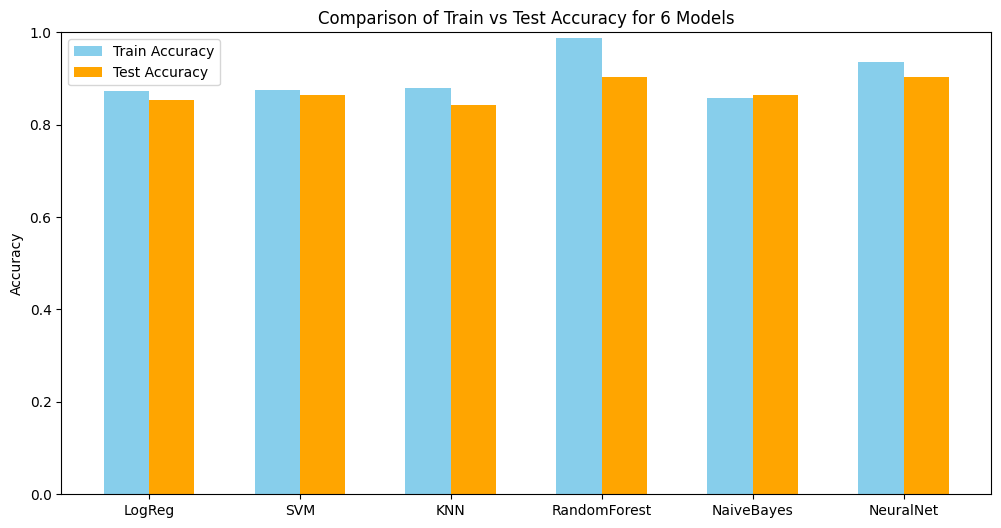

In [202]:
# Logistic Regression
y_train_pred_lr = best_model_lr.predict(X_train)
y_test_pred_lr = best_model_lr.predict(X_test)

# SVM
y_train_pred_svm = best_model_svm.predict(X_train)
y_test_pred_svm = best_model_svm.predict(X_test)

# KNN
y_train_pred_knn = best_model_knn.predict(X_train)
y_test_pred_knn = best_model_knn.predict(X_test)

# Random Forest
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

# Naive Bayes
y_train_pred_nb = gnb.predict(X_train)
y_test_pred_nb = gnb.predict(X_test)

# Neural Network
final_model.eval()
with torch.no_grad():
    y_train_pred_nn = (final_model(X_train_tensor) > 0.5).float()
    y_test_pred_nn = (final_model(X_test_tensor) > 0.5).float()


train_acc = [
    accuracy_score(y_train, y_train_pred_lr),
    accuracy_score(y_train, y_train_pred_svm),
    accuracy_score(y_train, y_train_pred_knn),
    accuracy_score(y_train, y_train_pred_rf),
    accuracy_score(y_train, y_train_pred_nb),
    accuracy_score(y_train, y_train_pred_nn)
]

test_acc = [
    accuracy_score(y_test, y_test_pred_lr),
    accuracy_score(y_test, y_test_pred_svm),
    accuracy_score(y_test, y_test_pred_knn),
    accuracy_score(y_test, y_test_pred_rf),
    accuracy_score(y_test, y_test_pred_nb),
    accuracy_score(y_test, y_test_pred_nn)
]

models = ['LogReg', 'SVM', 'KNN', 'RandomForest', 'NaiveBayes', 'NeuralNet']


x = range(len(models))
plt.figure(figsize=(12,6))
plt.bar([i-0.15 for i in x], train_acc, width=0.3, label='Train Accuracy', color='skyblue')
plt.bar([i+0.15 for i in x], test_acc, width=0.3, label='Test Accuracy', color='orange')
plt.xticks(x, models)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparison of Train vs Test Accuracy for 6 Models')
plt.legend()
plt.show()


# So model Random forest and Neural Network have better accuracy resluts on this data